In [7]:
%matplotlib inline
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit import *
provider = IBMQ.load_account()

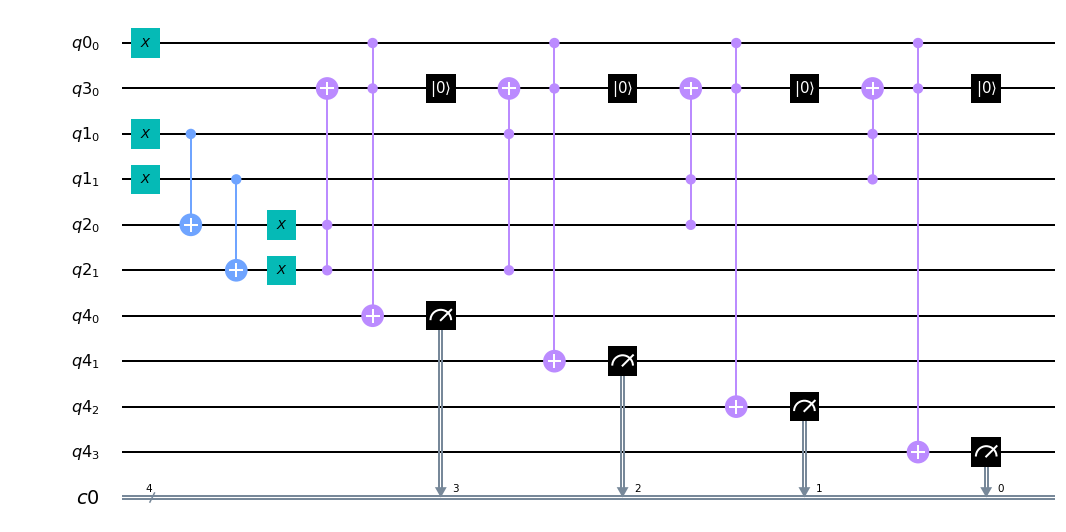

In [8]:
simulator = Aer.get_backend('qasm_simulator')
qi = QuantumRegister(1)
qs = QuantumRegister(2)
qxs = QuantumRegister(2)
qb = QuantumRegister(1)
qo = QuantumRegister(4)
c = ClassicalRegister(4)
circuit = QuantumCircuit(qi,qb,qs,qxs,qo,c)
circuit.x(qi[0])
circuit.x(qs[1])
circuit.x(qs[0])
for i in range(0,2):
    circuit.cx(qs[i],qxs[i])
    circuit.x(qxs[i])
and3(circuit,qxs[0],qxs[1],qi[0],qb[0],qo[0])
and3(circuit,qs[0],qxs[1],qi[0],qb[0],qo[1])
and3(circuit,qxs[0],qs[1],qi[0],qb[0],qo[2])
and3(circuit,qs[0],qs[1],qi[0],qb[0],qo[3])

circuit.measure(qo[0],c[3])
circuit.measure(qo[1],c[2])
circuit.measure(qo[2],c[1])
circuit.measure(qo[3],c[0])
circuit.draw()


In [1]:
list_0001 = list()
list_0100 = list()
list_1000 = list()
list_0010 = list()
for i in range(100,8200,400):
    job = execute(circuit,simulator,shots=i)
    result = job.result()
    counts = result.get_counts(circuit)
    for j in counts.keys():
        val = float(counts.get(str(j),"0"))
        ans = val/(i+1)
        if j=="0001":
            list_0001.append(ans)
        if j=="0100":
            list_0100.append(ans)
        if j=="0010":
            list_0010.append(ans)
        if j=="1000":
            list_1000.append(ans)
import matplotlib.pyplot as py
py.plot(list_0001)
py.plot(list_0010)
py.plot(list_0100)
py.plot(list_1000)

NameError: name 'execute' is not defined

In [10]:
def fun_or(qc,q0,q1,q2):
    qc.x(q0)
    qc.x(q1)
    qc.ccx(q0,q1,q2)
    qc.x(q2)
    qc.x(q1)
    qc.x(q0)

In [11]:
def or3(qc,q0,q1,q2,b,q3):
    fun_or(qc,q0,q1,b)
    fun_or(qc,b,q2,q3)
    qc.reset(b)

In [12]:
def fun_and(qc,q0,q1,q2):
    qc.ccx(q0,q1,q2)

In [13]:
def and3(qc,q0,q1,q2,b,q3):
    fun_and(qc,q0,q1,b)
    fun_and(qc,b,q2,q3)
    qc.reset(b)

In [14]:
def or4(qc,q0,q1,q2,q3,b1,b2,q4):
    or3(qc,q0,q1,q2,b1,b2)
    fun_or(qc,b2,q3,q4)
    qc.reset(b1)
    qc.reset(b2)

{'0001': 8192}


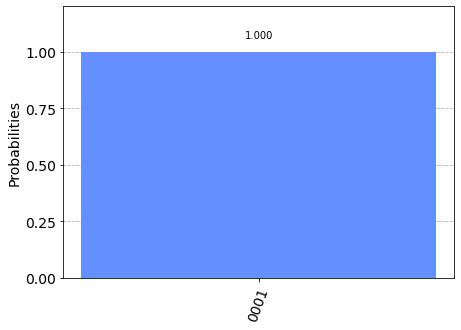

In [15]:
job = execute(circuit,simulator,shots = 8192)
result = job.result()
counts = result.get_counts(circuit)
print(counts)
plot_histogram(counts)